### Read the data from csv

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the csv
df = pd.read_csv("exp1_network_growth_data.csv")

print("Experiment data analysis - Network growth")
print("Number of samples:", df["n_sample"].max())
print("Number of RDDs by sample:", df["n_network"].max())
print("Range of RDDs:", df["n_rdds"].min(),"-", df["n_rdds"].max())

df.head(20)

Experiment data analysis - Network growth
Number of samples: 500
Number of RDDs by sample: 8
Range of RDDs: 3 - 10


,n_sample,n_network,n_rdds,n_rdda_attractors,t_find_attractors_method,n_pair_attractors,t_comp_paris_method,n_attractor_fields,t_optimized_method
0,1,1,3,14,1.127742,27,0.036490,5,0.016521
1,1,2,4,29,0.567921,160,0.044149,24,0.037182
2,1,3,5,49,0.785318,275,0.062197,0,0.004468
3,1,4,6,50,0.936676,380,0.095642,27,0.244904
4,1,5,7,54,0.887210,231,0.058252,0,0.003945
5,1,6,8,58,1.106747,269,0.077590,0,0.004609
6,1,7,9,84,1.309441,552,0.151569,22140,111.774940
7,1,8,10,70,1.714525,420,0.110270,0,0.005381
8,2,1,3,20,0.503945,84,0.029529,4,0.008386
9,2,2,4,37,0.679339,214,0.111320,20,0.075949


In [47]:
# Maior quantidade de Campos atratores, implicam maior diversidade de tamanhos de atratores.
# Corelação  de numero de Campos com a quantidad de de Estado de cada atrator.

# Quais sao os fatores que induccem numero de estados maiores nos atratores.

In [48]:
df.groupby(['n_rdds']).mean()['n_rdda_attractors']
# Correlação de # Numero  de RDDs e numero de atratores

# Correlação de # Numero  de RDDs e numero de pares

# Correlação de # Numero  de RDDs e numero de campos

# Qual e a correlaçaõ entre o numero de attratores, pares e campos atratores.

n_rdds
3     23.004
4     31.174
5     38.614
6     47.008
7     56.244
8     64.062
9     70.698
10    79.532
Name: n_rdda_attractors, dtype: float64

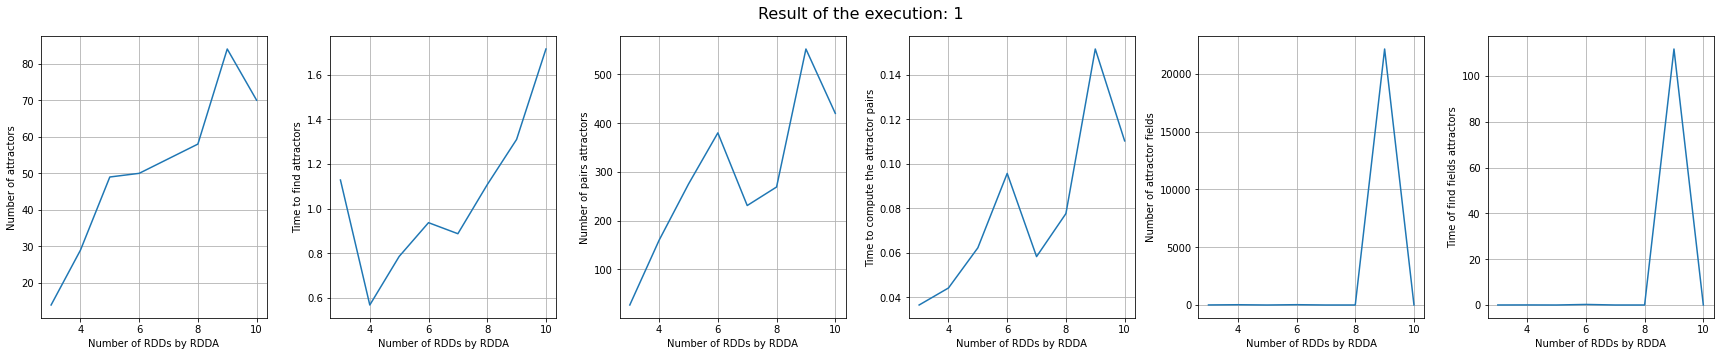

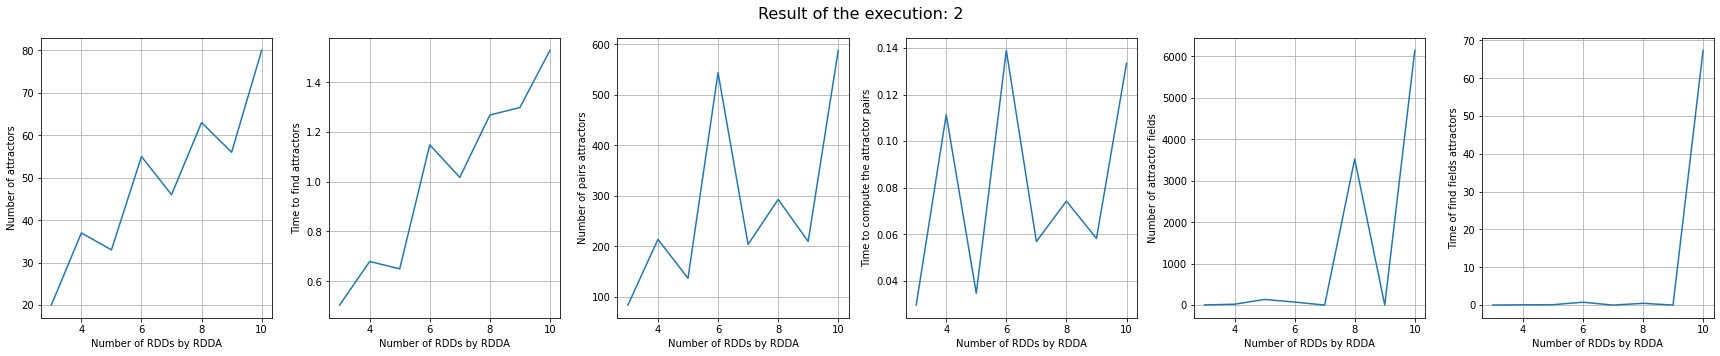

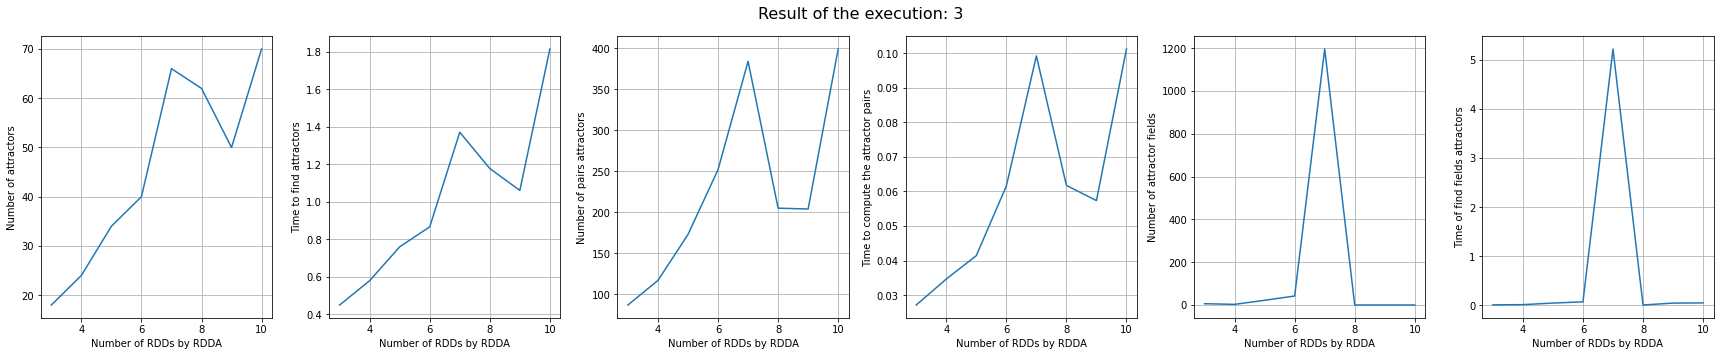

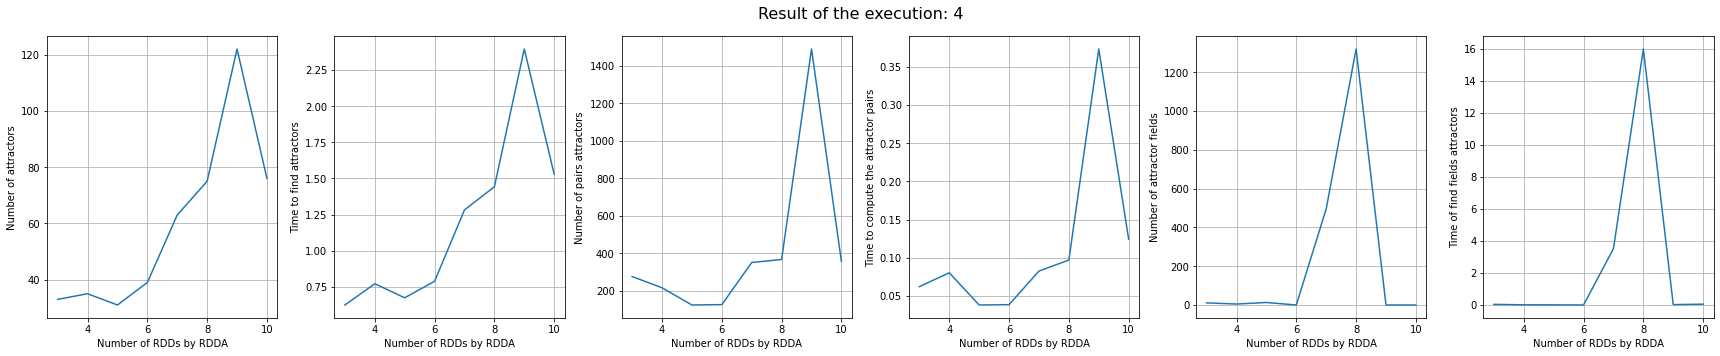

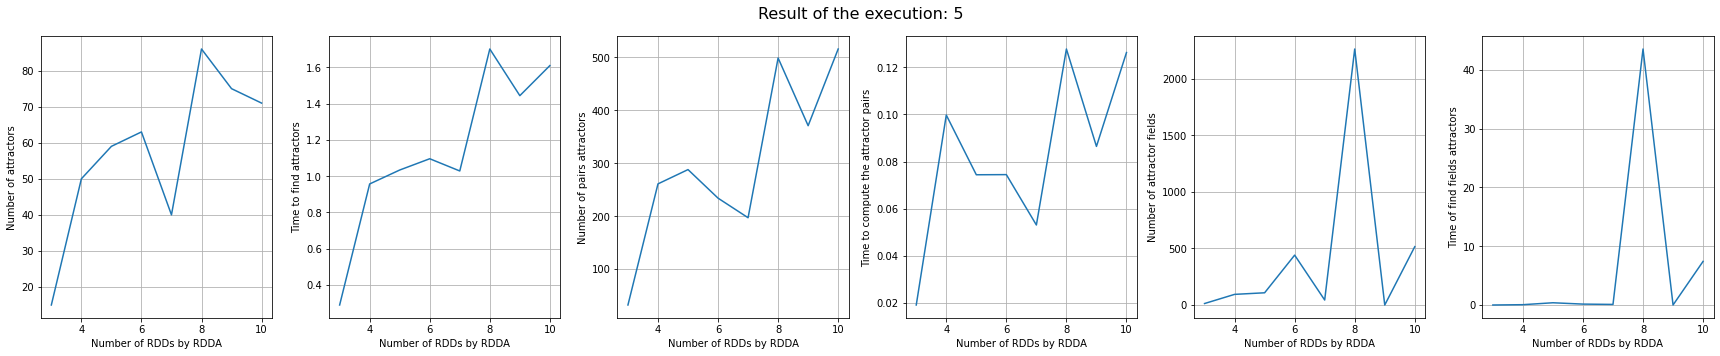

In [52]:
l_labels_y = ["Number of attractors", "Time to find attractors", "Number of pairs attractors", "Time to compute the attractor pairs", "Number of attractor fields", "Time of find fields attractors"]

grouped = df.groupby("n_sample")
labels = {key:label for key, label in zip(df.keys()[3:], [
          "Number of attractors",
          "Time to find attractors",
          "Number of pairs attractors",
          "Time to compute the attractor pairs",
          "Number of attractor fields",
          "Time of find fields attractors"])}

for number in np.array(list(grouped.groups.keys()))[:5]:
    group = grouped.get_group(number)
    fig_, axs = plt.subplots(1,6,figsize=(24,5))
    for (ax, key) in zip(axs, group.keys()[3:]):
        ax.plot(group['n_rdds'], group[key])
        ax.set_xlabel('Number of RDDs by RDDA')
        ax.set_ylabel(labels[key])
        ax.grid(True)
    fig_.suptitle('Result of the execution: ' + str(number), fontsize=16)
    fig_.tight_layout()

### Boxplot for every indicator - General vision

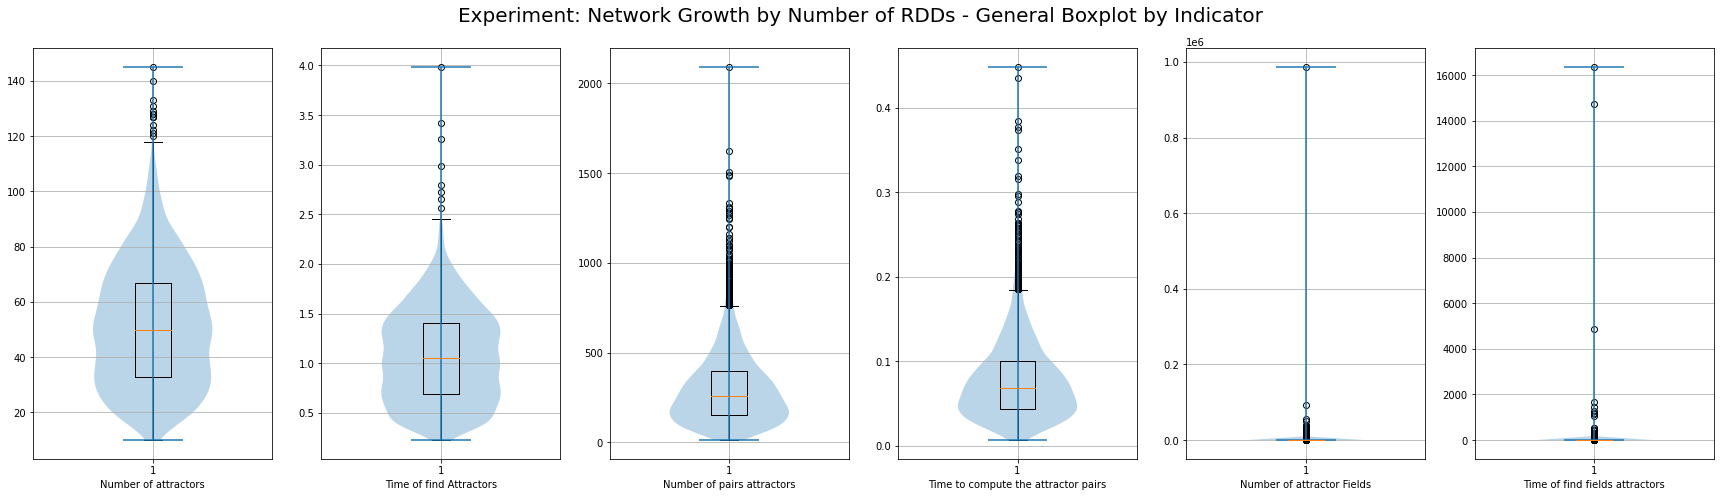

In [50]:
# General Boxplot by Indicator
l_labels_y = ["Number of attractors", "Time of find Attractors", "Number of pairs attractors", "Time to compute the attractor pairs", "Number of attractor Fields", "Time of find fields attractors"]

fig_, axs = plt.subplots(1,6,figsize=(24,7))
cont_label = 0
for (key,ax) in zip(df.keys()[3:], axs):
    ax.boxplot(df[key])
    ax.violinplot(df[key])
    ax.set_xlabel(l_labels_y[cont_label])
    ax.grid(True)
    cont_label += 1
fig_.suptitle('Experiment: Network Growth by Number of RDDs - General Boxplot by Indicator', fontsize=20)
fig_.tight_layout()

### Boxplot for every Indicator - Indicator across all the samples for every number of RDDs

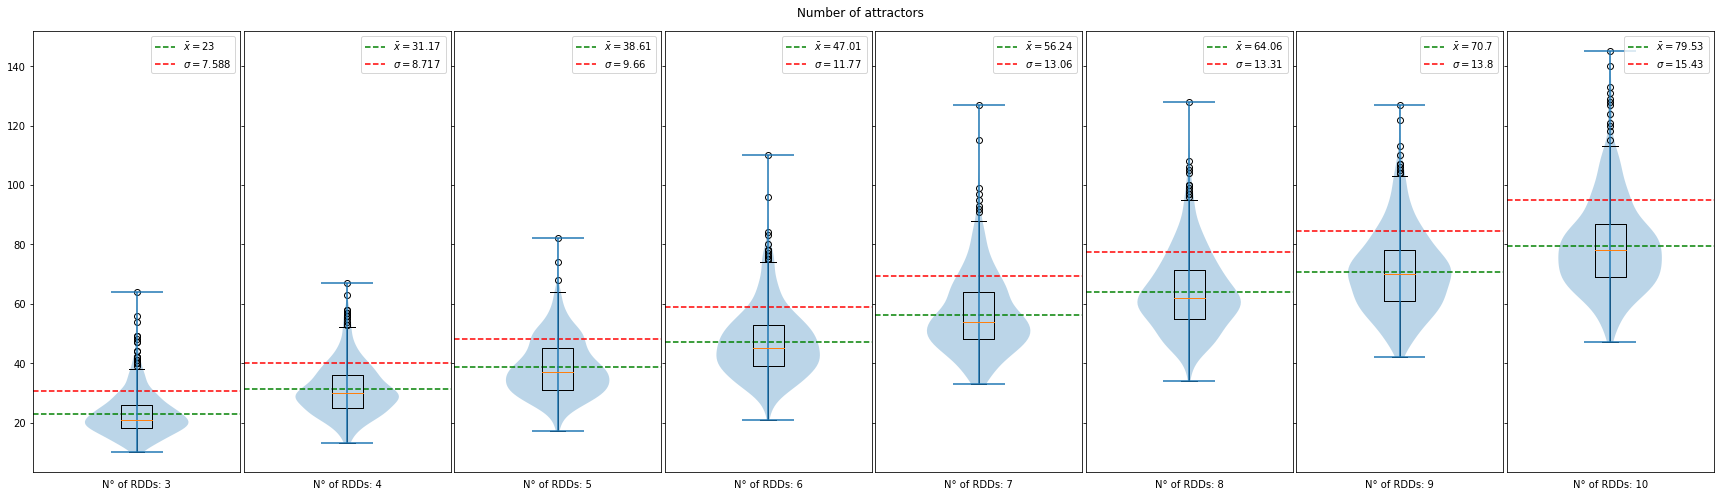

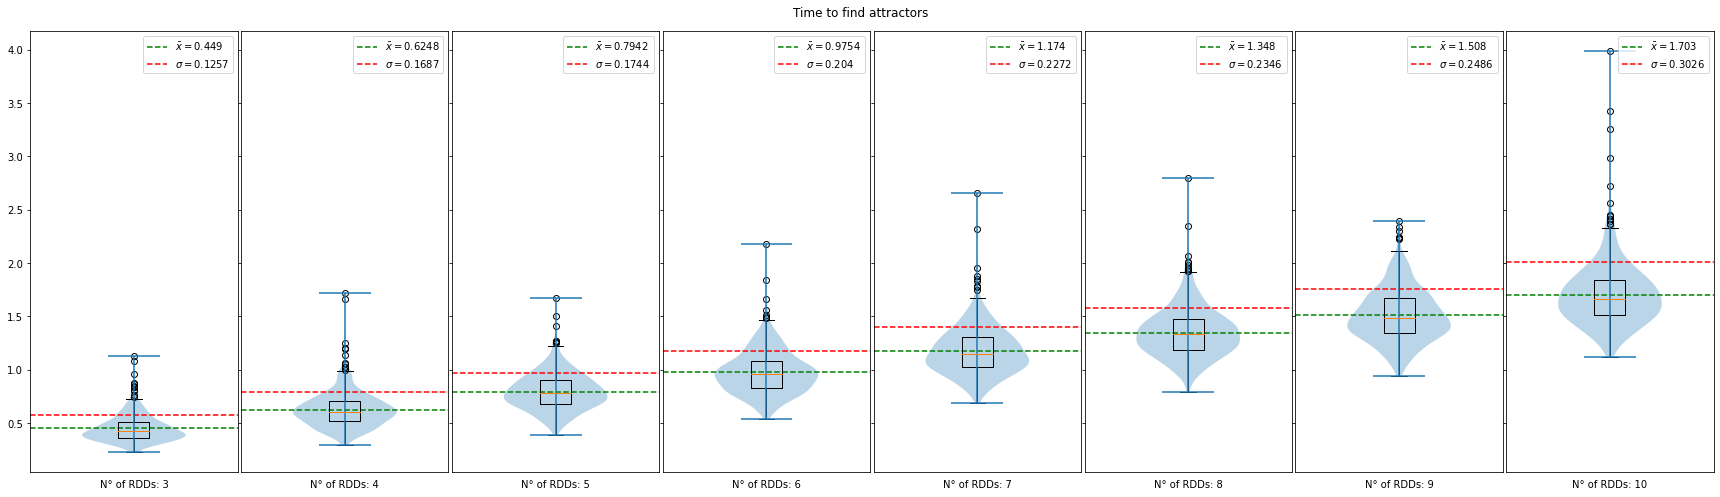

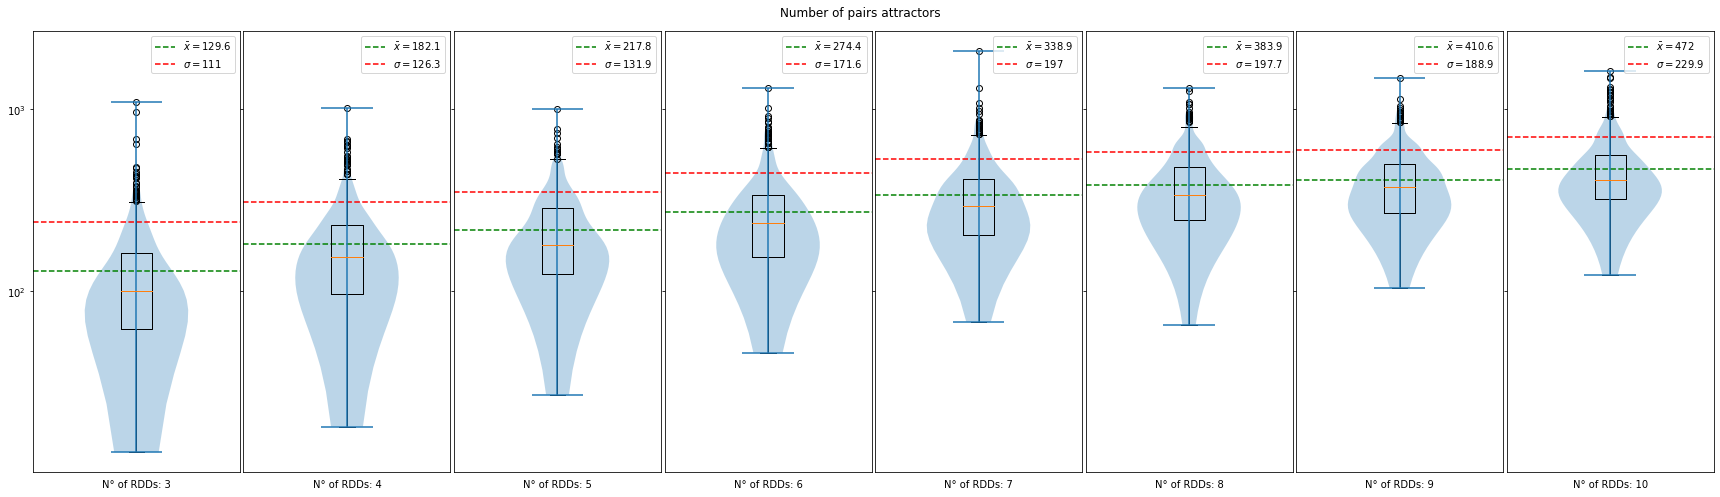

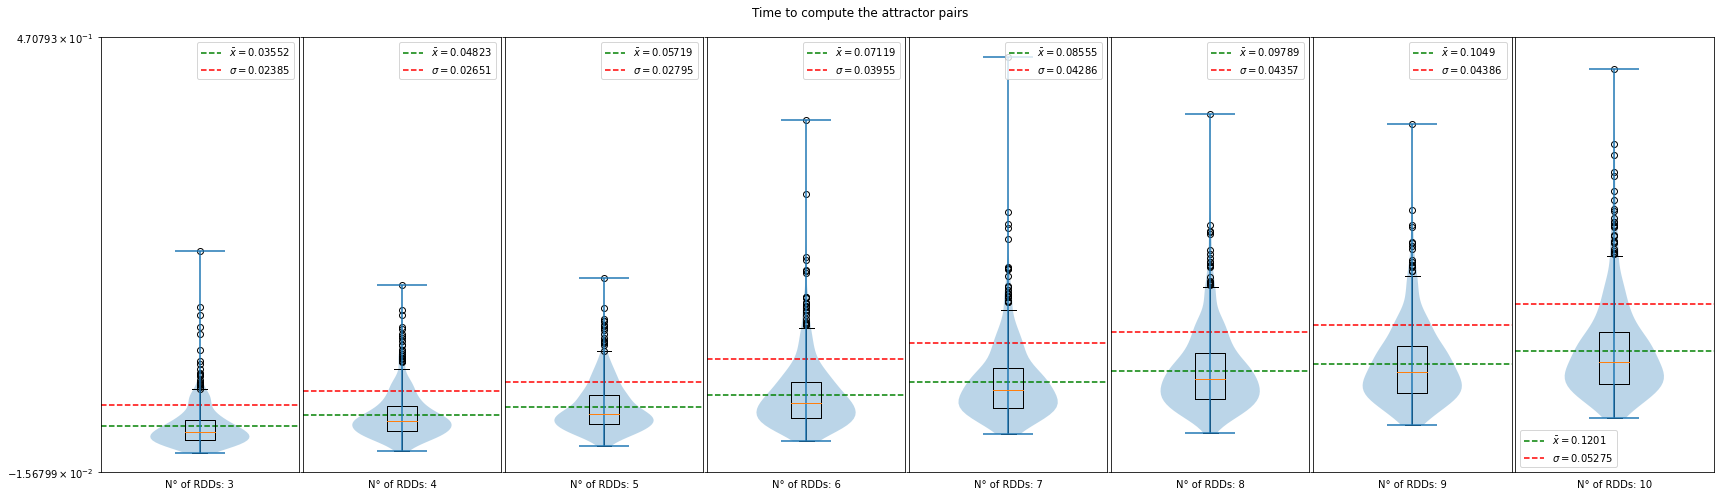

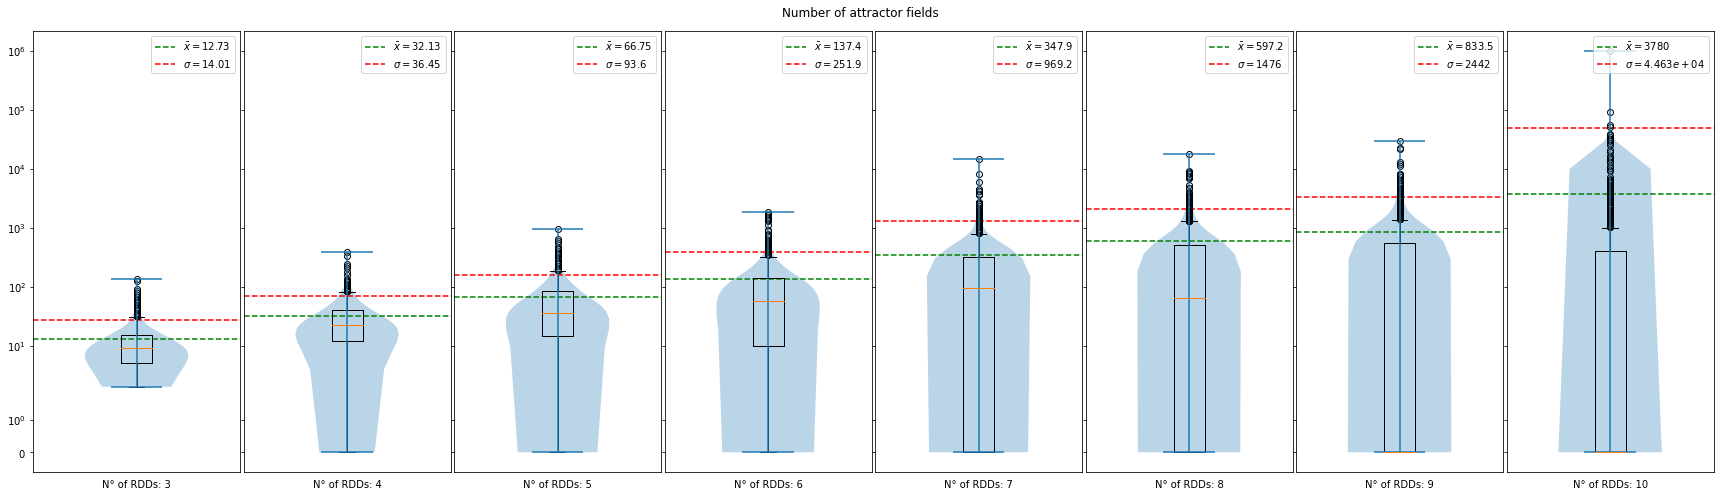

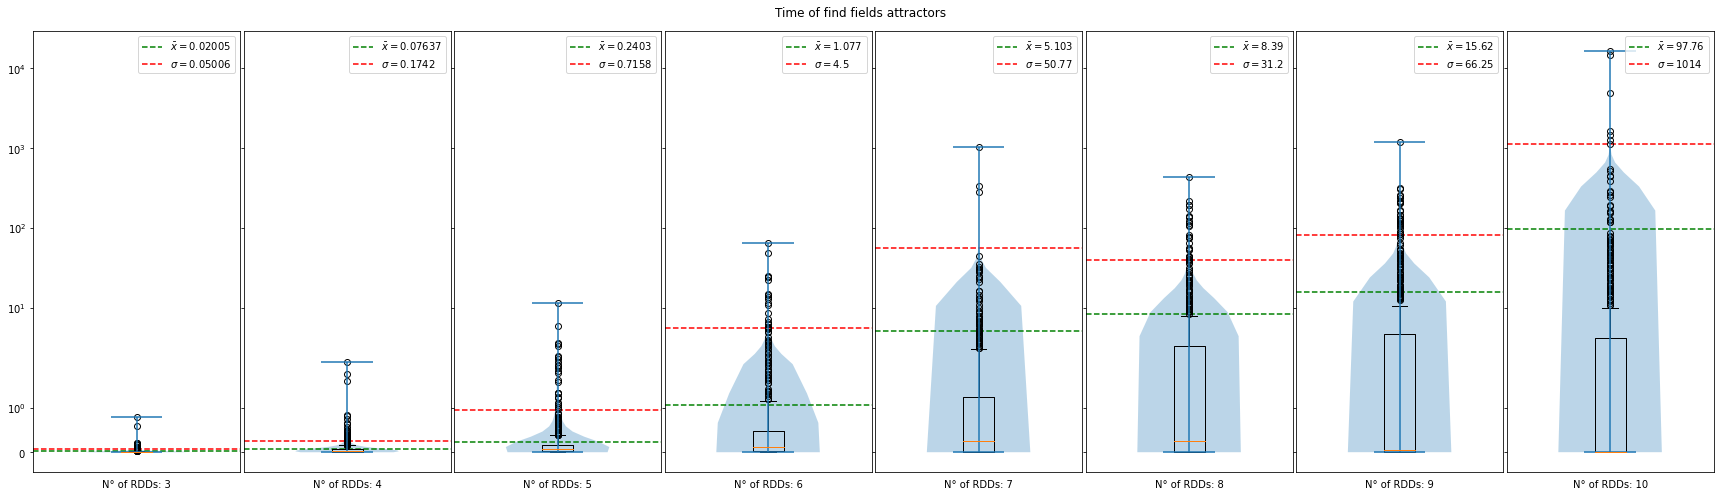

In [53]:
n_rdds = df['n_rdds'].unique()
labels = {key:label for key, label in zip(df.keys()[3:], [
          "Number of attractors",
          "Time to find attractors",
          "Number of pairs attractors",
          "Time to compute the attractor pairs",
          "Number of attractor fields",
          "Time of find fields attractors"])}
log_scale = {key:label for key, label in zip(df.keys()[3:], [
          False,
          False,
          True,
          True,
          True,
          True])}
grouped = df.groupby("n_rdds")

for key in df.keys()[3:]:
    fig, axs = plt.subplots(1, n_rdds.size, figsize=(n_rdds.size*3,7), sharey=True)
    for ax, n_rdd in zip(axs, n_rdds):
        group = grouped.get_group(n_rdd)
        data = group[key]
        mean = ax.axhline(y=data.mean(), xmin=0.0, xmax=1.0, color='g',ls='--',label=fr'$\bar{{x}}={data.mean():.4g}$')
        #std_min = ax.axhline(y=data.mean()-data.std(), xmin=0.0, xmax=1.0, color='r',ls='--')
        std_max = ax.axhline(y=data.mean()+data.std(), xmin=0.0, xmax=1.0, color='r',ls='--',label=fr'$\sigma={data.std():.4g}$')
        ax.legend()
        if log_scale[key]:
            ax.set_yscale('symlog')
        ax.boxplot(data)
        ax.violinplot(data)
        ax.set_xlabel(f'N° of RDDs: {n_rdd}')
        ax.set_xticks([])
        ax.set_xlim((0.5,1.5))
    fig.suptitle(labels[key])
    fig.tight_layout(w_pad=0)